In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('./output'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./output/queries_df.csv
./output/metric.pkl
./output/model_pretrained.pkl
./output/model.pkl
./output/.ipynb_checkpoints/queries_df-checkpoint.csv
./output/verbs/APPLYING.csv
./output/verbs/REMEMBERING.csv
./output/verbs/EVALUATING.csv
./output/verbs/CREATING.csv
./output/verbs/ANALYZING.csv
./output/verbs/UNDERSTANDING.csv
./output/verbs/.ipynb_checkpoints/REMEMBERING-checkpoint.csv


!pip install wordcloud

In [4]:
import pandas as pd #Pandas is easy-to-use data structures and data analysis tools for the Python programming language.
import numpy as np #Linear algebra 
import re #regex applies a regular expression to a string and returns the matching substrings. 
import matplotlib.pyplot as plt
import nltk 
import nltk.corpus
from nltk.corpus import stopwords
from nltk.tokenize import BlanklineTokenizer
from nltk.tokenize import TweetTokenizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
import string
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from multiprocessing import Pool

[nltk_data] Downloading package punkt to /home/kameni_a/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/kameni_a/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/kameni_a/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df = pd.read_csv("./output/queries_df.csv")
df.head()

,QUERY,REMEMBERING,UNDERSTANDING,APPLYING,ANALYZING,EVALUATING,CREATING
0,"""their own language"" means _ .",1.0,0.0,0.0,0.0,0.0,0.0
1,"""you may think the popular singer jay chow is ...",0.0,1.0,0.0,0.0,0.0,0.0
2,". at midnight, nasreddin saw _ in his garden.",1.0,0.0,0.0,0.0,0.0,0.0
3,. david beckham is _ years old.,1.0,0.0,0.0,0.0,0.0,0.0
4,. david beckham's family name is _ and zhou...,1.0,0.0,0.0,0.0,0.0,0.0


In [6]:
categories = ["REMEMBERING", "UNDERSTANDING", "APPLYING", "ANALYZING", "EVALUATING", "CREATING"]

In [7]:
def unidecode_text(text):
    try:
        text = unidecode.unidecode(text)
    except:
        pass
    return text

df["QUERY_UC"] = df.QUERY.apply(unidecode_text)

In [9]:
from sklearn.model_selection import train_test_split
y = pd.Series(np.dot(df[categories], range(6)))
X_train, X_test, y_train, y_test = train_test_split(df["QUERY_UC"], y, random_state=42, test_size=.3)

In [11]:
y_train.head()

22095     3.0
106666    0.0
64563     0.0
135741    3.0
93299     5.0
dtype: float64

In [12]:
train_data = pd.DataFrame(X_train.values, index=X_train.index, columns=["text"])
train_data["target"] = y_train.values

test_data = pd.DataFrame(X_test.values, index=X_test.index, columns=["text"])
test_data["target"] = y_test.values

In [13]:
def clean_text(df, text_field, new_text_field_name):
    df[new_text_field_name] = df[text_field].str.lower() #Convert strings in the Series/Index to lowercase.
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    # remove numbers
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    
    return df

data_clean = clean_text(train_data, 'text', 'text_clean')
data_clean_test = clean_text(test_data,'text', 'text_clean')
data_clean.head()

,text,target,text_clean
22095,"4:41 , does lone pair also make bonds sometimes ?",3.0,does lone pair also make bonds sometimes
106666,what purpose did the monroe doctrine serve ?,0.0,what purpose did the monroe doctrine serve
64563,what is `` e '' ?,0.0,what is e
135741,does the heart rate differ from boy to girl ?,3.0,does the heart rate differ from boy to girl
93299,so y=mx+b could be a function ( if of course t...,5.0,so ymxb could be a function if of course the ...


**Note**: Visualiser ce qui se passe lorsqu'on supprime "stopwords"

In [14]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
data_clean['text_clean'] = data_clean['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head()

,text,target,text_clean
22095,"4:41 , does lone pair also make bonds sometimes ?",3.0,lone pair also make bonds sometimes
106666,what purpose did the monroe doctrine serve ?,0.0,purpose monroe doctrine serve
64563,what is `` e '' ?,0.0,e
135741,does the heart rate differ from boy to girl ?,3.0,heart rate differ boy girl
93299,so y=mx+b could be a function ( if of course t...,5.0,ymxb could function course b numbers rather va...


In [15]:
data_clean = clean_text(train_data, 'text', 'text_clean')
data_clean_test = clean_text(test_data,'text', 'text_clean')
data_clean.head()

,text,target,text_clean
22095,"4:41 , does lone pair also make bonds sometimes ?",3.0,does lone pair also make bonds sometimes
106666,what purpose did the monroe doctrine serve ?,0.0,what purpose did the monroe doctrine serve
64563,what is `` e '' ?,0.0,what is e
135741,does the heart rate differ from boy to girl ?,3.0,does the heart rate differ from boy to girl
93299,so y=mx+b could be a function ( if of course t...,5.0,so ymxb could be a function if of course the ...


In [16]:
from nltk.tokenize import sent_tokenize, word_tokenize
data_clean['text_tokens'] = data_clean['text_clean'].apply(lambda x: word_tokenize(x))
data_clean.head()

,text,target,text_clean,text_tokens
22095,"4:41 , does lone pair also make bonds sometimes ?",3.0,does lone pair also make bonds sometimes,"[does, lone, pair, also, make, bonds, sometimes]"
106666,what purpose did the monroe doctrine serve ?,0.0,what purpose did the monroe doctrine serve,"[what, purpose, did, the, monroe, doctrine, se..."
64563,what is `` e '' ?,0.0,what is e,"[what, is, e]"
135741,does the heart rate differ from boy to girl ?,3.0,does the heart rate differ from boy to girl,"[does, the, heart, rate, differ, from, boy, to..."
93299,so y=mx+b could be a function ( if of course t...,5.0,so ymxb could be a function if of course the ...,"[so, ymxb, could, be, a, function, if, of, cou..."


In [17]:
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize
def word_stemmer(text):
    stem_text = [PorterStemmer().stem(i) for i in text]
    return stem_text
data_clean['text_clean_tokens'] = data_clean['text_tokens'].apply(lambda x: word_stemmer(x))
data_clean.head()

,text,target,text_clean,text_tokens,text_clean_tokens
22095,"4:41 , does lone pair also make bonds sometimes ?",3.0,does lone pair also make bonds sometimes,"[does, lone, pair, also, make, bonds, sometimes]","[doe, lone, pair, also, make, bond, sometim]"
106666,what purpose did the monroe doctrine serve ?,0.0,what purpose did the monroe doctrine serve,"[what, purpose, did, the, monroe, doctrine, se...","[what, purpos, did, the, monro, doctrin, serv]"
64563,what is `` e '' ?,0.0,what is e,"[what, is, e]","[what, is, e]"
135741,does the heart rate differ from boy to girl ?,3.0,does the heart rate differ from boy to girl,"[does, the, heart, rate, differ, from, boy, to...","[doe, the, heart, rate, differ, from, boy, to,..."
93299,so y=mx+b could be a function ( if of course t...,5.0,so ymxb could be a function if of course the ...,"[so, ymxb, could, be, a, function, if, of, cou...","[so, ymxb, could, be, a, function, if, of, cou..."


In [18]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text
data_clean['text_clean_tokens'] = data_clean['text_tokens'].apply(lambda x: word_lemmatizer(x))
data_clean.head()

[nltk_data] Downloading package wordnet to /home/kameni_a/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,target,text_clean,text_tokens,text_clean_tokens
22095,"4:41 , does lone pair also make bonds sometimes ?",3.0,does lone pair also make bonds sometimes,"[does, lone, pair, also, make, bonds, sometimes]","[doe, lone, pair, also, make, bond, sometimes]"
106666,what purpose did the monroe doctrine serve ?,0.0,what purpose did the monroe doctrine serve,"[what, purpose, did, the, monroe, doctrine, se...","[what, purpose, did, the, monroe, doctrine, se..."
64563,what is `` e '' ?,0.0,what is e,"[what, is, e]","[what, is, e]"
135741,does the heart rate differ from boy to girl ?,3.0,does the heart rate differ from boy to girl,"[does, the, heart, rate, differ, from, boy, to...","[doe, the, heart, rate, differ, from, boy, to,..."
93299,so y=mx+b could be a function ( if of course t...,5.0,so ymxb could be a function if of course the ...,"[so, ymxb, could, be, a, function, if, of, cou...","[so, ymxb, could, be, a, function, if, of, cou..."


In [19]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)



data_clean['text_clean'] = data_clean['text_clean'].apply(lambda x: remove_URL(x))

In [20]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

data_clean['text_clean'] = data_clean['text_clean'].apply(lambda x: remove_html(x))

In [21]:
# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

data_clean['text_clean'] = data_clean['text_clean'].apply(lambda x: remove_emoji(x))

In [22]:
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

data_clean['text_clean'] = data_clean['text_clean'].apply(lambda x: remove_punct(x))

In [23]:
!pip3 install pyspellchecker

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.9 MB 6.9 MB/s eta 0:00:01



from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

data_clean['text_clean'] = data_clean['text_clean'].apply(lambda x: correct_spellings(x))

In [25]:
data_clean.head()

,text,target,text_clean,text_tokens,text_clean_tokens
22095,"4:41 , does lone pair also make bonds sometimes ?",3.0,does lone pair also make bonds sometimes,"[does, lone, pair, also, make, bonds, sometimes]","[doe, lone, pair, also, make, bond, sometimes]"
106666,what purpose did the monroe doctrine serve ?,0.0,what purpose did the monroe doctrine serve,"[what, purpose, did, the, monroe, doctrine, se...","[what, purpose, did, the, monroe, doctrine, se..."
64563,what is `` e '' ?,0.0,what is e,"[what, is, e]","[what, is, e]"
135741,does the heart rate differ from boy to girl ?,3.0,does the heart rate differ from boy to girl,"[does, the, heart, rate, differ, from, boy, to...","[doe, the, heart, rate, differ, from, boy, to,..."
93299,so y=mx+b could be a function ( if of course t...,5.0,so ymxb could be a function if of course the ...,"[so, ymxb, could, be, a, function, if, of, cou...","[so, ymxb, could, be, a, function, if, of, cou..."


In [28]:
freq = pd.Series(' '.join(data_clean['text_clean']).split()).value_counts() # [:10]

In [29]:
freq.head(15)

the     141691
is       62722
of       52900
a        50973
to       43197
and      34911
in       30280
what     30240
how      29708
why      21668
you      21402
that     21295
do       20548
it       19774
does     18086
dtype: int64

In [31]:
freq.tail(15)

fluor                1
hipothenuse          1
beggings             1
neighbour            1
gophersun            1
orbitalselectrons    1
npropyl              1
malphigian           1
wordform             1
btech                1
convexity            1
oraganisoms          1
defensins            1
utube                1
methed               1
dtype: int64

freq = list(freq.index[:10]) + list(freq[freq==1].index)
data_clean['text_cml_freq'] = data_clean['text_clean'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [33]:
data_clean.head()

,text,target,text_clean,text_tokens,text_clean_tokens
22095,"4:41 , does lone pair also make bonds sometimes ?",3.0,does lone pair also make bonds sometimes,"[does, lone, pair, also, make, bonds, sometimes]","[doe, lone, pair, also, make, bond, sometimes]"
106666,what purpose did the monroe doctrine serve ?,0.0,what purpose did the monroe doctrine serve,"[what, purpose, did, the, monroe, doctrine, se...","[what, purpose, did, the, monroe, doctrine, se..."
64563,what is `` e '' ?,0.0,what is e,"[what, is, e]","[what, is, e]"
135741,does the heart rate differ from boy to girl ?,3.0,does the heart rate differ from boy to girl,"[does, the, heart, rate, differ, from, boy, to...","[doe, the, heart, rate, differ, from, boy, to,..."
93299,so y=mx+b could be a function ( if of course t...,5.0,so ymxb could be a function if of course the ...,"[so, ymxb, could, be, a, function, if, of, cou...","[so, ymxb, could, be, a, function, if, of, cou..."


In [34]:
data_clean.shape

(132859, 5)

In [36]:
X_train, X_val, y_train, y_val = train_test_split(data_clean['text_clean'],
                                                    data_clean['target'], 
                                                    test_size = 0.2,
                                                    random_state = 42)

In [37]:
tfidf = TfidfVectorizer(encoding='utf-8',
                       ngram_range=(1, 3),
                       max_df=1.0,
                       min_df=3,
                       max_features=750,
                       norm='l2',
                       sublinear_tf=True)

In [38]:
train_features = tfidf.fit_transform(X_train).toarray()
print(train_features.shape)

(106287, 750)


In [39]:
val_features = tfidf.transform(X_val).toarray()
print(val_features.shape)

(26572, 750)


In [40]:
train_labels = y_train
val_labels = y_val

In [41]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [53]:
import metrics_tmp as met

In [43]:
mnb_classifier = MultinomialNB()
mnb_classifier.fit(train_features, train_labels)

MultinomialNB()

In [44]:
mnb_prediction = mnb_classifier.predict(val_features)

Accuracy = 0.654
----------------------------------------
Classification report:
               precision    recall  f1-score   support

  REMEMBERING       0.70      0.76      0.72      6561
UNDERSTANDING       0.63      0.21      0.32      1253
     APPLYING       0.69      0.43      0.53      3349
    ANALYZING       0.73      0.66      0.69      5491
   EVALUATING       0.69      0.33      0.44      2245
     CREATING       0.58      0.83      0.69      7673

     accuracy                           0.65     26572
    macro avg       0.67      0.54      0.57     26572
 weighted avg       0.67      0.65      0.64     26572

----------------------------------------
Confusion matrix


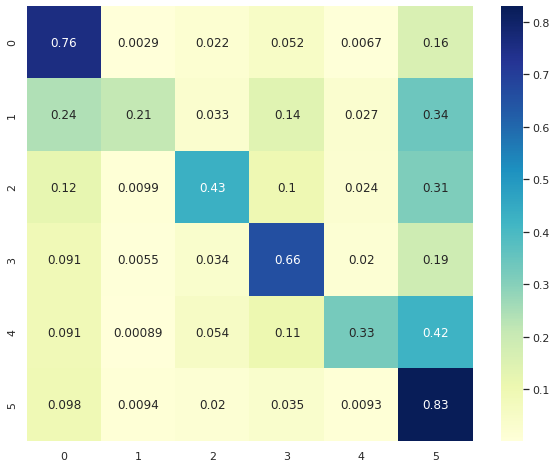

In [54]:
met.print_stats(mnb_prediction, val_labels, range(6), categories=categories)

In [55]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [56]:
lr = LogisticRegression().fit(train_features, train_labels)

/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy = 0.877
----------------------------------------
Classification report:
               precision    recall  f1-score   support

  REMEMBERING       0.89      0.91      0.90      6561
UNDERSTANDING       0.83      0.67      0.74      1253
     APPLYING       0.85      0.82      0.84      3349
    ANALYZING       0.88      0.90      0.89      5491
   EVALUATING       0.85      0.81      0.83      2245
     CREATING       0.88      0.91      0.90      7673

     accuracy                           0.88     26572
    macro avg       0.87      0.84      0.85     26572
 weighted avg       0.88      0.88      0.88     26572

----------------------------------------
Confusion matrix


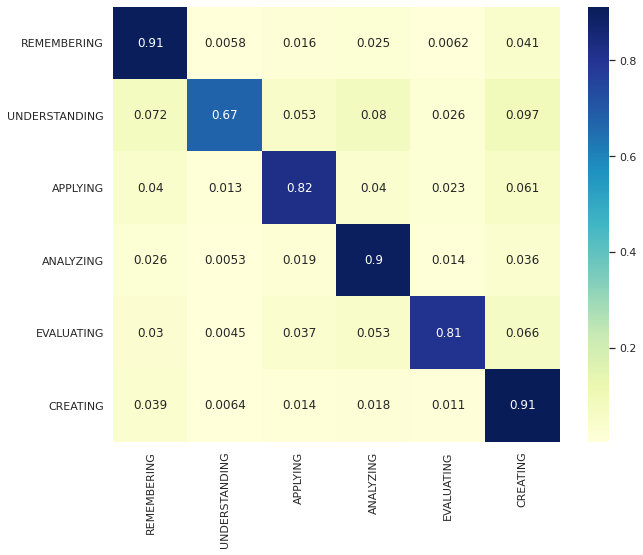

In [57]:
preds = lr.predict(val_features)
met.print_stats(preds, val_labels, categories, categories=categories)

In [58]:
lr = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42).fit(train_features, train_labels)

Accuracy = 0.851
----------------------------------------
Classification report:
               precision    recall  f1-score   support

  REMEMBERING       0.91      0.87      0.89      6561
UNDERSTANDING       0.53      0.85      0.65      1253
     APPLYING       0.80      0.86      0.83      3349
    ANALYZING       0.90      0.86      0.88      5491
   EVALUATING       0.74      0.89      0.81      2245
     CREATING       0.93      0.82      0.87      7673

     accuracy                           0.85     26572
    macro avg       0.80      0.86      0.82     26572
 weighted avg       0.87      0.85      0.86     26572

----------------------------------------
Confusion matrix


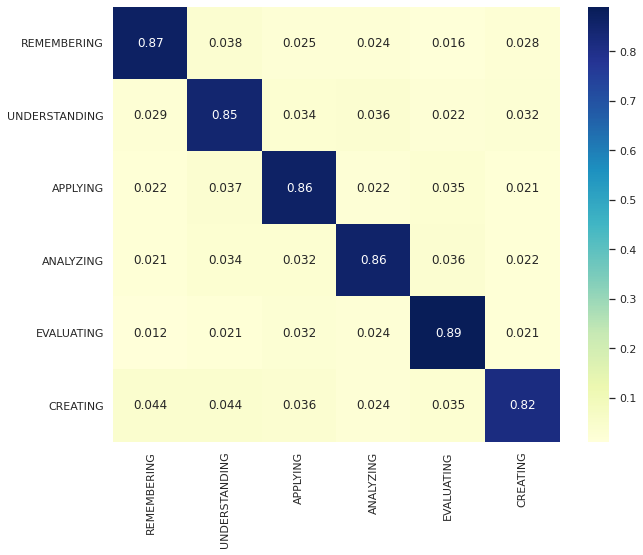

In [59]:
preds = lr.predict(val_features)
met.print_stats(preds, val_labels, categories, categories=categories)

In [61]:
sgdc = SGDClassifier().fit(train_features, train_labels)

Accuracy = 0.822
----------------------------------------
Classification report:
               precision    recall  f1-score   support

  REMEMBERING       0.82      0.90      0.86      6561
UNDERSTANDING       0.83      0.43      0.57      1253
     APPLYING       0.81      0.77      0.79      3349
    ANALYZING       0.82      0.87      0.84      5491
   EVALUATING       0.91      0.56      0.69      2245
     CREATING       0.81      0.89      0.85      7673

     accuracy                           0.82     26572
    macro avg       0.83      0.74      0.77     26572
 weighted avg       0.82      0.82      0.82     26572

----------------------------------------
Confusion matrix


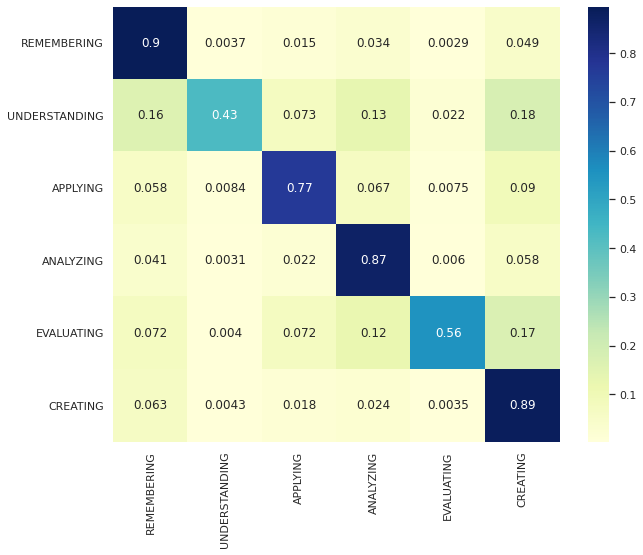

In [62]:
preds = sgdc.predict(val_features)
met.print_stats(preds, val_labels, categories, categories=categories)